# Trend Analysis and Visualization

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from ydata_profiling import ProfileReport

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
from colorama import Fore, Back, Style
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

### Getting to know data

In [3]:
df = pd.read_csv("datasets/News_Final.csv")
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [21]:
df.describe()

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
count,93239.0000,93239.0000,93239.0000,93239.0000,93239.0000,93239.000
mean,51560.6533,-0.0054,-0.0275,113.1413,3.8884,16.548
std,30391.0787,0.1364,0.1420,620.1732,18.4926,154.459
min,1.0000,-0.9507,-0.7554,-1.0000,-1.0000,-1.000
25%,24301.5000,-0.0791,-0.1146,0.0000,0.0000,0.000
50%,52275.0000,0.0000,-0.0261,5.0000,0.0000,0.000
75%,76585.5000,0.0643,0.0597,33.0000,2.0000,4.000
max,104802.0000,0.9624,0.9646,49211.0000,1267.0000,20341.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93239 non-null  float64
 1   Title              93239 non-null  object 
 2   Headline           93224 non-null  object 
 3   Source             92960 non-null  object 
 4   Topic              93239 non-null  object 
 5   PublishDate        93239 non-null  object 
 6   SentimentTitle     93239 non-null  float64
 7   SentimentHeadline  93239 non-null  float64
 8   Facebook           93239 non-null  int64  
 9   GooglePlus         93239 non-null  int64  
 10  LinkedIn           93239 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


In [4]:
df.shape

(93239, 11)

### Data Cleaning

In [4]:
#Count Null Rows
df.isnull().sum()
df.fillna(0)

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
93234,61851.0,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07 15:31:05,0.104284,0.044943,-1,3,5
93235,61865.0,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",TASS,economy,2016-07-07 15:31:10,0.072194,0.000000,-1,0,1
93236,104793.0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,Daily Caller,palestine,2016-07-07 15:38:26,0.291667,-0.139754,5,1,0
93237,104794.0,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,Ahram Online,palestine,2016-07-07 15:59:22,0.121534,0.092313,0,0,0


### Data Analysis by Viz

In [5]:
print(type(df['Topic']))
populer_trend=df.groupby('Topic').size().unique
print(populer_trend)
list_topic=df['Topic'].values.tolist()

<class 'pandas.core.series.Series'>
<bound method Series.unique of Topic
economy      33928
microsoft    21858
obama        28610
palestine     8843
dtype: int64>


In [6]:
print(df.groupby('Source').size().sort_values(ascending=False))
popular_headline=df.groupby('Source').size()
print(popular_headline.sort_values(ascending=False))
list_headline=df['Source'].values.tolist()

Source
Bloomberg                                1732
Reuters                                  1321
ABC News                                 1098
New York Times                            992
The Guardian                              933
                                         ... 
Indonesia Investments (press release)       1
Industrial Laser Solutions Magazine         1
TVbytheNumbers                              1
TVPredictions.com                           1
                                        1
Length: 5756, dtype: int64
Source
Bloomberg                                1732
Reuters                                  1321
ABC News                                 1098
New York Times                            992
The Guardian                              933
                                         ... 
Indonesia Investments (press release)       1
Industrial Laser Solutions Magazine         1
TVbytheNumbers                              1
TVPredictions.com                      

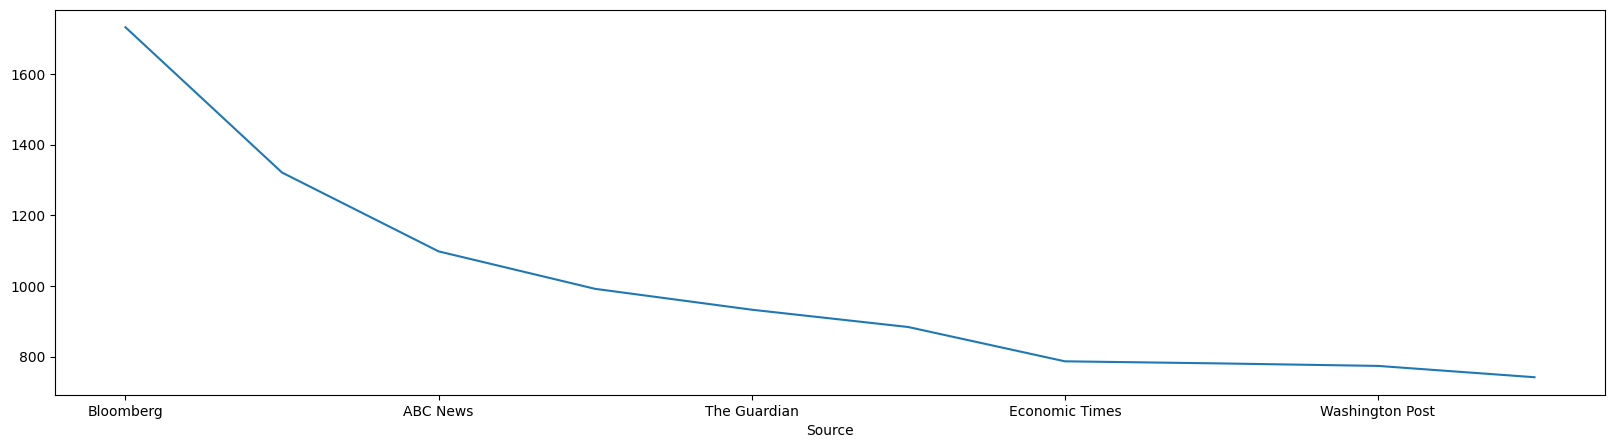

In [7]:
plt1 = df.Source.value_counts().head(10).reset_index(name='count').style.background_gradient(cmap='Blues')
plt2 = df.Source.value_counts().head(10).plot(kind='line', figsize=(20,5))

In [8]:
pd.set_option('display.precision', 4)
df.describe()

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
count,93239.0000,93239.0000,93239.0000,93239.0000,93239.0000,93239.000
mean,51560.6533,-0.0054,-0.0275,113.1413,3.8884,16.548
std,30391.0787,0.1364,0.1420,620.1732,18.4926,154.459
min,1.0000,-0.9507,-0.7554,-1.0000,-1.0000,-1.000
25%,24301.5000,-0.0791,-0.1146,0.0000,0.0000,0.000
50%,52275.0000,0.0000,-0.0261,5.0000,0.0000,0.000
75%,76585.5000,0.0643,0.0597,33.0000,2.0000,4.000
max,104802.0000,0.9624,0.9646,49211.0000,1267.0000,20341.000


<Axes: title={'center': 'Top Topic Trending'}, xlabel='Counts', ylabel='Topic'>

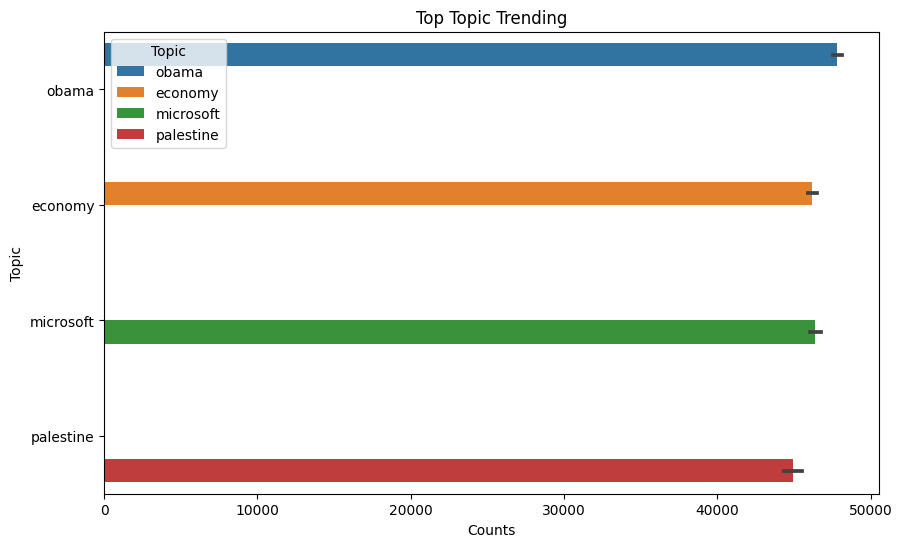

In [9]:
plt.figure(figsize=(10,6))
plt.title('Top Topic Trending')
plt.xlabel('Counts') 
plt.ylabel('Trending Topic')
sns.barplot(x=df.index, y=df['Topic'], hue=df['Topic'])


<Axes: >

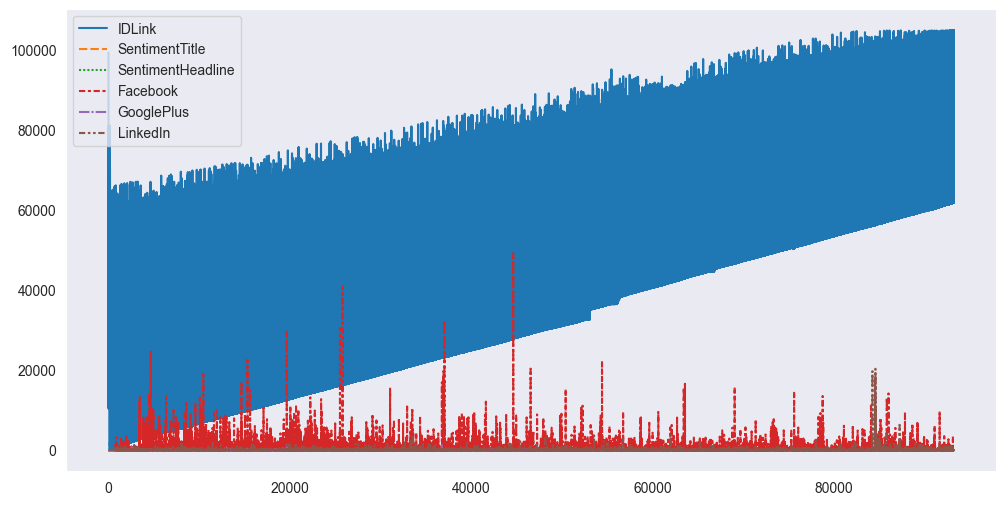

In [10]:
sns.set_style('dark')
plt.figure(figsize=(12,6))  
sns.lineplot(data=df)

<Axes: xlabel='Topic', ylabel='SentimentTitle'>

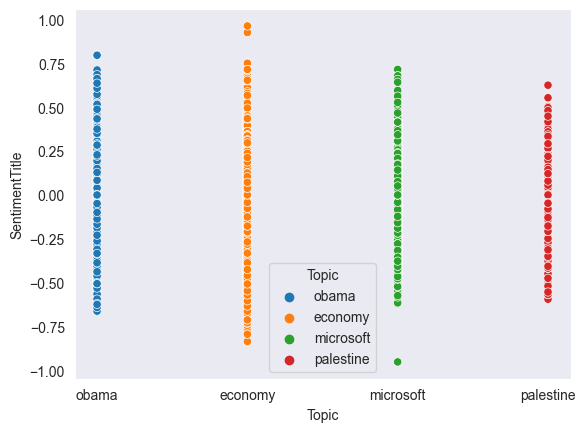

In [11]:
sns.scatterplot(x=df['Topic'], y=df['SentimentTitle'], hue=df['Topic'])

In [33]:
dviz = ProfileReport(df, title="Top Trending")
dviz.to_file("Top Trending.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 66.16it/s]


# THE END

<Axes: xlabel='Topic', ylabel='IDLink'>

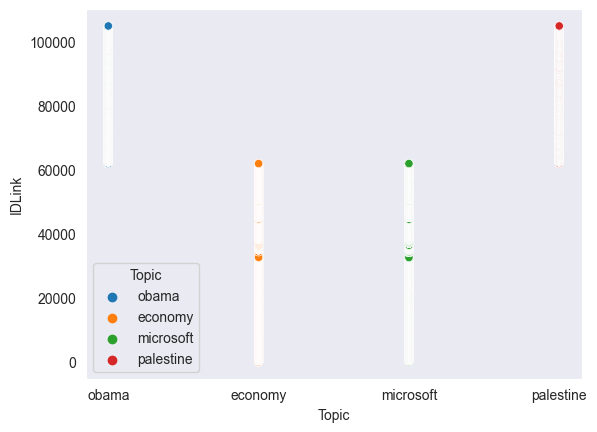

In [25]:
sns.scatterplot(x=df['Topic'], y=df['IDLink'], hue=df['Topic'])

In [27]:
df1 = df[['IDLink','Topic']]
df1.head()

,IDLink,Topic
0,99248.0,obama
1,10423.0,economy
2,18828.0,economy
3,27788.0,economy
4,27789.0,economy


In [30]:
#Assign unique number to each topic (1,2,3,4)
df1['Topic'] = df1['Topic'].astype('category')
df1['Topic'] = df1['Topic'].cat.codes
df1.head()


,IDLink,Topic
0,99248.0,2
1,10423.0,0
2,18828.0,0
3,27788.0,0
4,27789.0,0


In [35]:
df1['IDLink'].corr(df1['Topic'])

0.748824582554781

In [39]:
df.Facebook.sort_values(ascending=False).head(10)


44634    49211
25813    40836
37050    32385
25528    30489
19658    29564
4662     24594
15329    22518
54426    22346
46551    20371
36933    19771
Name: Facebook, dtype: int64

In [44]:
df1['Facebook'] = df['Facebook']

In [51]:
df['tcol'] = np.log1p(df['Facebook'])
df['tcol'].value_counts().head()

tcol
 0.0000    16844
-inf       11602
 0.6931     6413
 1.0986     4764
 1.3863     3557
Name: count, dtype: int64

In [52]:
#replace -inf with 0
df['tcol'] = df['tcol'].replace([np.inf, -np.inf], 99)

In [53]:
df['tcol'].value_counts().head()

tcol
0.0000     16844
99.0000    11602
0.6931      6413
1.0986      4764
1.3863      3557
Name: count, dtype: int64

In [54]:
pd.DataFrame.skew(df['tcol'])

TypeError: super(type, obj): obj must be an instance or subtype of type